# IPL MATCH PREDICTION

> The main aim of this project is to predict the outcome of an IPL match by considering certain factors that are available in the dataset.

### Importing the required packages

In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
import seaborn as sns
from pandas import DataFrame
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [2]:
#importing the dataset
iplmatches = pd.read_csv(r'C:\Users\User\Desktop\IPL\matches.csv')

In [3]:
#viewing few lines of the dataset
iplmatches.head(5)

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2017,Hyderabad,05-04-2017,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,2017,Pune,06-04-2017,Mumbai Indians,Rising Pune Supergiants,Rising Pune Supergiants,field,normal,0,Rising Pune Supergiants,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,2017,Rajkot,07-04-2017,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,2017,Indore,08-04-2017,Rising Pune Supergiants,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,2017,Bangalore,08-04-2017,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN


In [4]:
#summarizing the dataset
iplmatches.describe()

,id,season,dl_applied,win_by_runs,win_by_wickets
count,756.000000,756.000000,756.000000,756.000000,756.000000
mean,1792.178571,2013.444444,0.025132,13.283069,3.350529
std,3464.478148,3.366895,0.156630,23.471144,3.387963
min,1.000000,2008.000000,0.000000,0.000000,0.000000
25%,189.750000,2011.000000,0.000000,0.000000,0.000000
50%,378.500000,2013.000000,0.000000,0.000000,4.000000
75%,567.250000,2016.000000,0.000000,19.000000,6.000000
max,11415.000000,2019.000000,1.000000,146.000000,10.000000


In [5]:
#finding the pair-wise correlation of all the column pairs
iplmatches.corr()

,id,season,dl_applied,win_by_runs,win_by_wickets
id,1.000000,0.668304,-0.011658,-0.039403,-0.012239
season,0.668304,1.000000,-0.001116,-0.037529,-0.009379
dl_applied,-0.011658,-0.001116,1.000000,-0.016349,-0.011631
win_by_runs,-0.039403,-0.037529,-0.016349,1.000000,-0.560420
win_by_wickets,-0.012239,-0.009379,-0.011631,-0.560420,1.000000


### Visualization

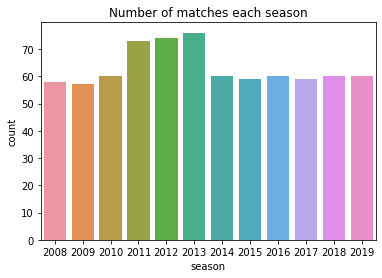

In [6]:
#plot to visualize total number of matches each season

sns.countplot(x = 'season', data = iplmatches)
plt.title('Number of matches each season')
plt.show()

Text(0.5, 1.0, 'Number of tosses won')

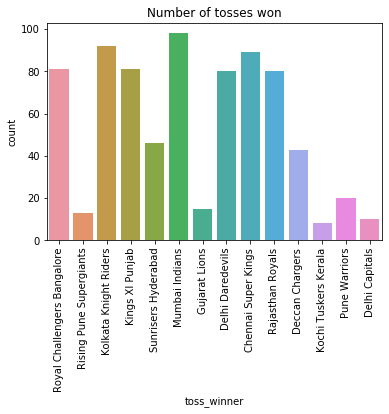

In [7]:
#plot depicting the total number of toss won by each team across all the seasons

sns.countplot( x = 'toss_winner', data = iplmatches)
plt.xticks(rotation='vertical')
plt.title('Number of tosses won')

Text(0.5, 1.0, 'Toss winners decision')

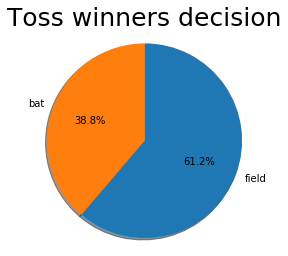

In [8]:
#Toss winners decision

decision = iplmatches['toss_decision'].value_counts()
plt.pie(decision, labels = decision.index, startangle = 90, counterclock = False,autopct='%1.1f%%',shadow=True)
plt.axis('square')
plt.title('Toss winners decision',size = 25)

Text(0.5, 1.0, 'Comparision of toss and match winners')

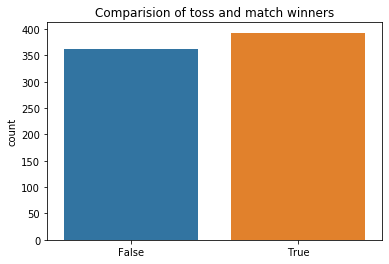

In [9]:
#combined the toss_winner and ipl winner 
#true and false are total combinations of the condition

winneroft = iplmatches['toss_winner'] == iplmatches['winner']
winneroft.groupby(winneroft).size()
sns.countplot(winneroft).set_title('Comparision of toss and match winners')

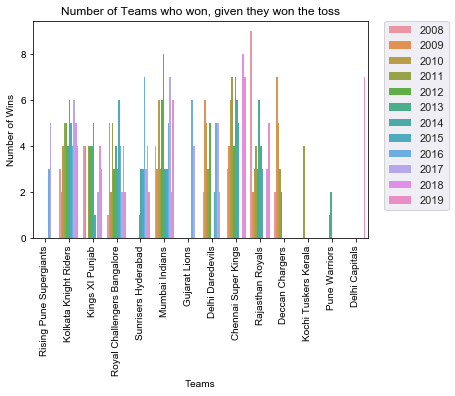

In [10]:
#seasonwise count of wins by team who won toss and won matches
winneroftoss = iplmatches[(iplmatches['toss_winner']) == (iplmatches['winner'])]
wot = sns.countplot( x = 'winner', hue='season', data=winneroftoss)
sns.set(rc={'figure.figsize':(22,18)})
plt.xticks(rotation = 'vertical')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.xlabel("Teams")
plt.ylabel("Number of Wins")
plt.title("Number of Teams who won, given they won the toss")
plt.show(wot)

Text(0.5, 1.0, 'Comparision of toss and match winners')

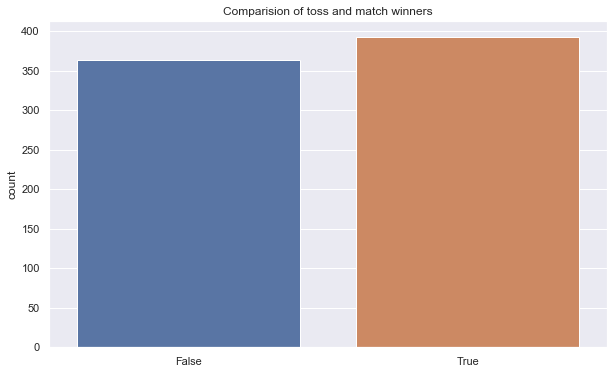

In [11]:
#number of times home team has won the match

won = iplmatches['team1'] == iplmatches['winner']
winneroft.groupby(winneroft).size()
sns.set(rc={'figure.figsize':(10,6)})
sns.countplot(winneroft).set_title('Comparision of toss and match winners')

C:\Users\User\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: MatplotlibDeprecationWarning: Non-1D inputs to pie() are currently squeeze()d, but this behavior is deprecated since 3.1 and will be removed in 3.3; pass a 1D array instead.
  


Text(0.5, 1.0, "RCB's home matches results")

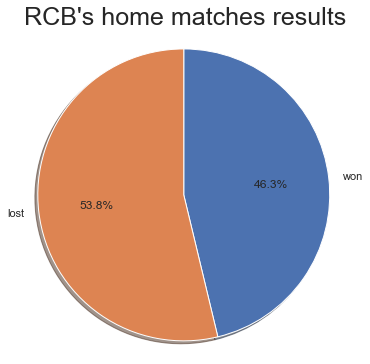

In [12]:
#number matches in bengaluru that RCB has won/lost

matches_in_bengaluru = iplmatches[(iplmatches['city'] == 'Bengaluru') | (iplmatches['city'] == 'Bangalore')]
matches_won_by_RCB = len(matches_in_bengaluru[matches_in_bengaluru['winner'] == 'Royal Challengers Bangalore'])
matches_lost_by_RCB = len(matches_in_bengaluru[matches_in_bengaluru['winner'] != 'Royal Challengers Bangalore'])
data = (matches_won_by_RCB, matches_lost_by_RCB)
rcb = pd.DataFrame(data = data, index = ['won','lost'])
plt.pie(rcb, labels = rcb.index, startangle = 90, counterclock = False,autopct='%1.1f%%',shadow=True)
plt.axis('square')
plt.title("RCB's home matches results",size = 25)

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], <a list of 10 Text xticklabel objects>)

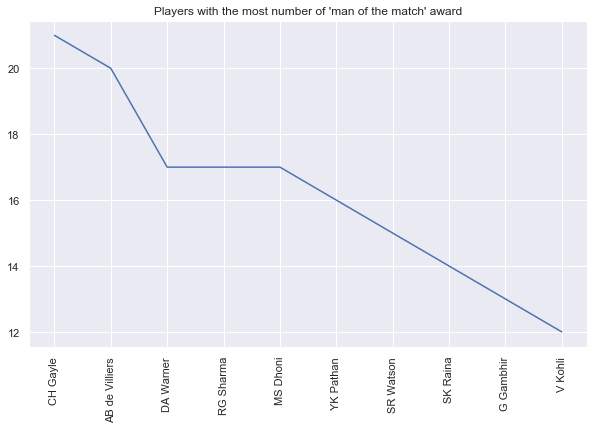

In [13]:
#top player of matches winners
top_players = iplmatches['player_of_match'].value_counts().head(10)
plt.title("Players with the most number of 'man of the match' award")
plt.plot(top_players)
plt.xticks(rotation = 90)

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13],
 <a list of 14 Text xticklabel objects>)

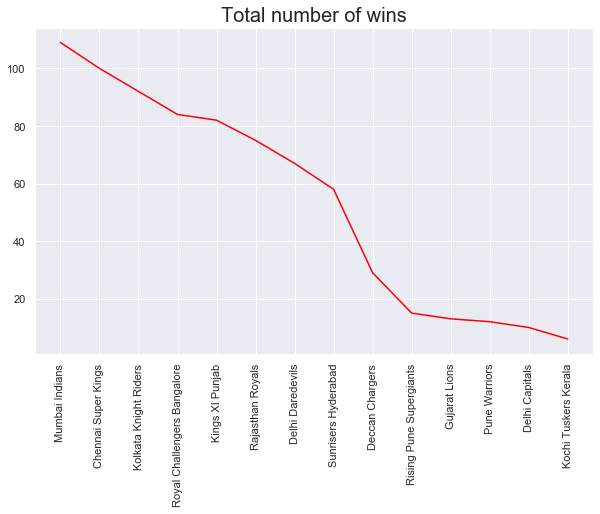

In [14]:
team_wins = iplmatches['winner'].value_counts()
team_wins.columns = ['Teams','Wins']

plt.plot(team_wins, color = 'red')
plt.title('Total number of wins',size = 20)
plt.xticks(rotation = 90)

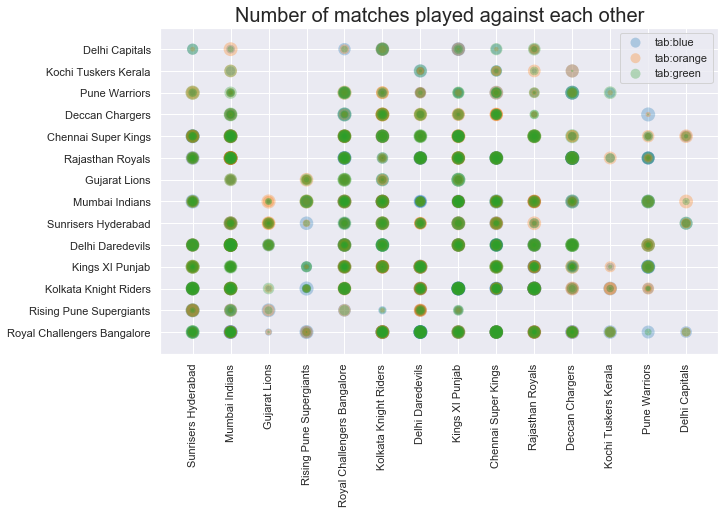

In [15]:
fig, ax = plt.subplots()
for color in ['tab:blue', 'tab:orange', 'tab:green']:
    n = 750
    scale = 200.0 * np.random.rand(n)
    ax.scatter(iplmatches['team1'],iplmatches['team2'], c=color, s=scale, label=color,
               alpha=0.3, edgecolors='none')

ax.legend()
ax.grid(True)

plt.title('Number of matches played against each other',size = 20)
plt.xticks(rotation = 90)
plt.show()

[Text(0, 0.5, 'id'),
 Text(0, 1.5, 'season'),
 Text(0, 2.5, 'dl_applied'),
 Text(0, 3.5, 'win_by_runs'),
 Text(0, 4.5, 'win_by_wickets')]

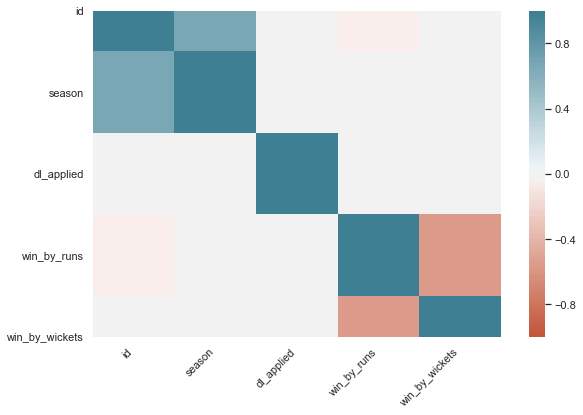

In [16]:
#plotting the heatmap of the correlation matrix

corr = iplmatches.corr()
ax = sns.heatmap(corr, vmin=-1, vmax=1, center=0, cmap=sns.diverging_palette(20, 220, n=200), square=True)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right')
ax.set_yticklabels(ax.get_yticklabels(), rotation = 0)

#### Importing the second dataset

In [17]:
matches = pd.read_csv(r'C:\Users\User\Desktop\IPL\matches_cleaned.csv')
matches.head(5)

,id,season,city,date,team1,team2,toss_winner,toss_decision,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,Team city,Is it a Home win?,Home win
0,1,2017,Hyderabad,05-04-2017,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,Sunrisers Hyderabad,True,1
1,2,2017,Pune,06-04-2017,Mumbai Indians,Rising Pune Supergiants,Rising Pune Supergiants,field,Rising Pune Supergiants,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,Rising Pune Supergiants,True,1
2,3,2017,Rajkot,07-04-2017,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,Gujarat Lions,False,0
3,4,2017,Indore,08-04-2017,Rising Pune Supergiants,Kings XI Punjab,Kings XI Punjab,field,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,Pune Warriors,False,0
4,5,2017,Bangalore,08-04-2017,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,Royal Challengers Bangalore,True,1


### Cleaning the dataset

In [18]:
# Make a copy of the dataset that you imported or used before

copy_data = matches.copy()
copy_data['city'].fillna('Dubai',inplace=True)
copy_data['umpire1'].fillna('Aleem Dar',inplace=True)

In [19]:
#check for NULL or NaN values

null_values_col = copy_data.isnull().sum()
null_values_col = null_values_col[null_values_col != 0].sort_values(ascending = False).reset_index()
null_values_col.columns = ["variable", "number of missing"]
null_values_col.head()

,variable,number of missing
0,Is it a Home win?,7
1,Team city,7
2,player_of_match,4
3,winner,4


In [20]:
df = DataFrame(copy_data,columns=['team1', 'team2', 'toss_decision','toss_winner','city', 'venue', 'season', 'win_by_runs', 'win_by_wickets', 'umpire1', 'Home win', 'winner'])

In [21]:
#replace team names with abbrevations

df.replace(['Mumbai Indians','Kolkata Knight Riders','Royal Challengers Bangalore','Deccan Chargers','Chennai Super Kings',
                 'Rajasthan Royals','Delhi Daredevils','Gujarat Lions','Kings XI Punjab',
                 'Sunrisers Hyderabad','Rising Pune Supergiants','Kochi Tuskers Kerala','Pune Warriors','Delhi Capitals']
                ,['MI','KKR','RCB','DC','CSK','RR','DD','GL','KXIP','SRH','RPS','KTK','PW','DCP'],inplace=True)

In [22]:
#Encoding the categorical data manually

encode = {'team1': {'MI':1,'KKR':2,'RCB':3,'DC':4,'CSK':5,'RR':6,'DD':7,'GL':8,'KXIP':9,'SRH':10,'RPS':11,'KTK':12,'PW':13,'DCP':14},
          'team2': {'MI':1,'KKR':2,'RCB':3,'DC':4,'CSK':5,'RR':6,'DD':7,'GL':8,'KXIP':9,'SRH':10,'RPS':11,'KTK':12,'PW':13,'DCP':14},
          'toss_winner': {'MI':1,'KKR':2,'RCB':3,'DC':4,'CSK':5,'RR':6,'DD':7,'GL':8,'KXIP':9,'SRH':10,'RPS':11,'KTK':12,'PW':13,'DCP':14},
          'winner': {'MI':1,'KKR':2,'RCB':3,'DC':4,'CSK':5,'RR':6,'DD':7,'GL':8,'KXIP':9,'SRH':10,'RPS':11,'KTK':12,'PW':13,'DCP':14,'Draw':15},
          'city': {'Hyderabad':1, 'Pune':2, 'Rajkot':3, 'Indore':4, 'Bangalore':5, 'Mumbai':6,
                   'Kolkata':7, 'Delhi':8, 'Chandigarh':9, 'Kanpur':10, 'Jaipur':11, 'Chennai':12,
                   'Cape Town':16, 'Port Elizabeth':15, 'Durban':14, 'Centurion':13,
                   'East London':17, 'Johannesburg':18, 'Kimberley':19, 'Bloemfontein':20,
                   'Ahmedabad':25, 'Cuttack':24, 'Nagpur':23, 'Dharamsala':22, 'Kochi':21,
                   'Visakhapatnam':26, 'Raipur':27, 'Ranchi':28, 'Abu Dhabi':29, 'Sharjah':30,
                   'Mohali':31, 'Bengaluru':5,'Dubai':32}}
df.replace(encode, inplace=True)


In [23]:
#encoding the rest of the categorical data using sklearn's LabelEncoder class

from sklearn.preprocessing import LabelEncoder
var_mod = ['toss_decision', 'venue', 'umpire1']
le = LabelEncoder()
for i in var_mod:
    df[i] = le.fit_transform(df[i])
    
df['city'].unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 16, 15, 14, 13, 17,
       18, 19, 20, 25, 24, 23, 22, 21, 26, 27, 28, 29, 30, 32, 31],
      dtype=int64)

In [24]:
#check for NULL or NaN values and dropping those rows

df.isna().any()
row_having_nan =  df.isnull().any(axis=1)
rows_with_NaN = df[row_having_nan]
rows_with_NaN
df.dropna(subset = ["winner"], inplace=True)

In [25]:
#converting the type of winner and city columns from object to int 

df['winner'].astype(str).astype(int)
df['city'].astype(str).astype(int)
df.dtypes

team1              int64
team2              int64
toss_decision      int32
toss_winner        int64
city               int64
venue              int32
season             int64
win_by_runs        int64
win_by_wickets     int64
umpire1            int32
Home win           int64
winner            object
dtype: object

In [26]:
#splitting the dataset

x = df[['team1', 'team2', 'toss_decision','toss_winner','city', 'venue', 'season','winner', 'win_by_runs', 'win_by_wickets', 'umpire1']]
y = df[['Home win']]

In [27]:
data = DataFrame(copy_data,columns=['season', 'win_by_runs', 'win_by_wickets', 'Home win'])
print(data.corr())

                  season  win_by_runs  win_by_wickets  Home win
season          1.000000    -0.037529       -0.009379  0.080917
win_by_runs    -0.037529     1.000000       -0.560420  0.069837
win_by_wickets -0.009379    -0.560420        1.000000 -0.070123
Home win        0.080917     0.069837       -0.070123  1.000000


### Fitting regression models

In [28]:
from pandas import DataFrame
from sklearn import linear_model
import statsmodels.api as sm

regr = linear_model.LinearRegression()
regr.fit(x,y)

model = sm.OLS(y,x.astype(float)).fit()

print_model = model.summary()
print_model

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:               Home win   R-squared (uncentered):                   0.439
Model:                            OLS   Adj. R-squared (uncentered):              0.431
Method:                 Least Squares   F-statistic:                              52.76
Date:                Fri, 19 Jun 2020   Prob (F-statistic):                    1.54e-85
Time:                        12:41:34   Log-Likelihood:                         -518.79
No. Observations:                 752   AIC:                                      1060.
Df Residuals:                     741   BIC:                                      1110.
Df Model:                          11                                                  
Covariance Type:            nonrobust                                                  
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
team1              0.0053      0.007      0.769      0.442      -0.008       0.019
team2              0.0099      0.008      1.260      0.208      -0.006       0.025
toss_decision      0.0163      0.037      0.444      0.657      -0.056       0.088
toss_winner       -0.0035      0.007     -0.475      0.635      -0.018       0.011
city              -0.0102      0.002     -4.207      0.000      -0.015      -0.005
venue             -0.0002      0.002     -0.117      0.907      -0.003       0.003
season             0.0003   3.93e-05      7.258      0.000       0.000       0.000
winner            -0.0162      0.007     -2.254      0.024      -0.030      -0.002
win_by_runs        0.0005      0.001      0.496      0.620      -0.001       0.002
win_by_wickets    -0.0093      0.006     -1.466      0.143      -0.022       0.003
umpire1           -0.0008      0.001     -0.724      0.469      -0.003       0.001
==============================================================================
Omnibus:                     3624.276   Durbin-Watson:                   1.845
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              106.473
Skew:                           0.306   Prob(JB):                     7.58e-24
Kurtosis:                       1.261   Cond. No.                     4.18e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.18e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [29]:
import warnings
with warnings.catch_warnings():
    warnings.simplefilter("ignore")

In [30]:
#splitting the dataset into training and testing set
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=0)

In [31]:
#fit the logisticRegression class and predict for X_test values

from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression()
logreg.fit(X_train, y_train)    

print('Logistic Regression score of train data: {:.2f}'.format(logreg.score(X_train,y_train)))
print('Logistic Regression score of test data: {:.2f}'.format(logreg.score(X_test,y_test)))

y_pred = logreg.predict(X_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test, y_test)))

Logistic Regression score of train data: 0.60
Logistic Regression score of test data: 0.59
Accuracy of logistic regression classifier on test set: 0.59


C:\Users\User\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\User\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [32]:
train_score = []
test_score=[]

In [33]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [34]:
for i in np.arange(1,80):
    
    logreg = LogisticRegression(penalty = 'l2', C = i,random_state = 0)
    y_train=y_train.astype('int')
    logreg.fit(X_train,y_train.values.ravel()) 
    
    train_score.append(logreg.score(X_train, y_train))
    test_score.append(logreg.score(X_test,y_test))

Text(0, 0.5, 'Accuracy')

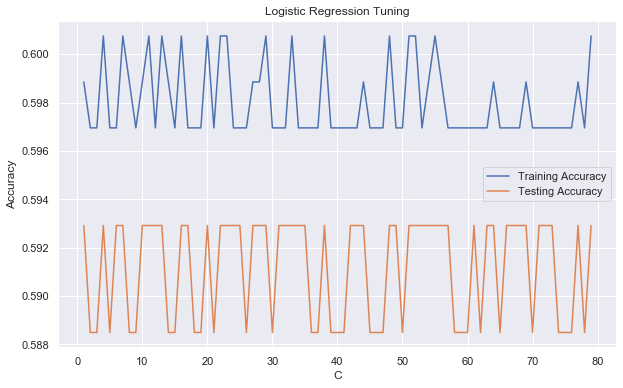

In [35]:
#plot a graph to visualize training and testing accuracy

plt.plot(np.arange(1,80),train_score)
plt.plot(np.arange(1,80),test_score)
plt.legend(['Training Accuracy','Testing Accuracy'])
plt.title('Logistic Regression Tuning')
plt.xlabel('C')
plt.ylabel('Accuracy')

In [36]:
df.dtypes

team1              int64
team2              int64
toss_decision      int32
toss_winner        int64
city               int64
venue              int32
season             int64
win_by_runs        int64
win_by_wickets     int64
umpire1            int32
Home win           int64
winner            object
dtype: object

In [37]:
df.head()

,team1,team2,toss_decision,toss_winner,city,venue,season,win_by_runs,win_by_wickets,umpire1,Home win,winner
0,10,3,1,3,1,28,2017,35,0,6,1,10
1,1,11,1,11,2,21,2017,0,7,1,1,11
2,8,2,1,2,3,31,2017,0,10,38,0,2
3,11,9,1,9,4,13,2017,0,6,3,0,9
4,3,7,0,3,5,17,2017,15,0,7,1,3


In [38]:
encode['team1']

{'MI': 1,
 'KKR': 2,
 'RCB': 3,
 'DC': 4,
 'CSK': 5,
 'RR': 6,
 'DD': 7,
 'GL': 8,
 'KXIP': 9,
 'SRH': 10,
 'RPS': 11,
 'KTK': 12,
 'PW': 13,
 'DCP': 14}

In [39]:
df.head()

,team1,team2,toss_decision,toss_winner,city,venue,season,win_by_runs,win_by_wickets,umpire1,Home win,winner
0,10,3,1,3,1,28,2017,35,0,6,1,10
1,1,11,1,11,2,21,2017,0,7,1,1,11
2,8,2,1,2,3,31,2017,0,10,38,0,2
3,11,9,1,9,4,13,2017,0,6,3,0,9
4,3,7,0,3,5,17,2017,15,0,7,1,3


## Predict the winner of a particular match using Decision Tree Regression

> The input to the model will be the home team, the away team, the toss winner and the city the match is played in.
> This model will use the sklearn.tree's DecisionTreeRegression class for classification and predicts the outcome.
> The model also outputs the accuracy of the output predicted result.
> The decision tree graph at the end shows how the model predicts the result based on the different parameters.

Enter team1	RCB
Enter team2	DD
Toss winner	RCB
Enter city	Bengaluru
RCB
Decision Tree Regression score of train data: 0.4246031746031744


[Text(390.59999999999997, 298.98, 'X[3] <= 16.5\nmse = 3.36\nsamples = 20\nvalue = 4.2'),
 Text(334.79999999999995, 244.62, 'X[3] <= 11.5\nmse = 3.654\nsamples = 17\nvalue = 4.412'),
 Text(279.0, 190.26000000000002, 'X[2] <= 5.0\nmse = 3.438\nsamples = 16\nvalue = 4.25'),
 Text(167.39999999999998, 135.9, 'X[1] <= 5.0\nmse = 2.765\nsamples = 9\nvalue = 3.889'),
 Text(111.6, 81.53999999999999, 'X[3] <= 6.5\nmse = 3.265\nsamples = 7\nvalue = 4.143'),
 Text(55.8, 27.180000000000007, 'mse = 3.556\nsamples = 3\nvalue = 4.333'),
 Text(167.39999999999998, 27.180000000000007, 'mse = 3.0\nsamples = 4\nvalue = 4.0'),
 Text(223.2, 81.53999999999999, 'mse = 0.0\nsamples = 2\nvalue = 3.0'),
 Text(390.59999999999997, 135.9, 'X[1] <= 5.0\nmse = 3.918\nsamples = 7\nvalue = 4.714'),
 Text(334.79999999999995, 81.53999999999999, 'mse = 0.0\nsamples = 1\nvalue = 7.0'),
 Text(446.4, 81.53999999999999, 'X[3] <= 6.5\nmse = 3.556\nsamples = 6\nvalue = 4.333'),
 Text(390.59999999999997, 27.180000000000007, 'mse

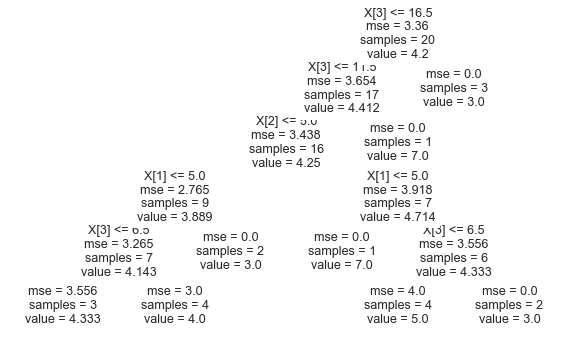

In [40]:
from sklearn.tree import DecisionTreeRegressor
from sklearn import tree
import sys

home_team = input('Enter team1\t')
away_team = input('Enter team2\t')
toss_winner = input('Toss winner\t')

if((toss_winner != home_team)):
    if(toss_winner != away_team):
        print("Invalid input")
        sys.exit()

city = input('Enter city\t')


x_ = df[((df['team1'] == encode['team1'][home_team]) & (df['team2'] == encode['team1'][away_team])) | ((df['team1'] == encode['team1'][away_team]) & (df['team2'] == encode['team1'][home_team]))]

x_train = x_[['team1','team2','toss_winner','city']]
y_train = x_[['winner']]

y_train = y_train.astype(int)
detreg = DecisionTreeRegressor()
detreg.fit(x_train, y_train)

data = { 'team1' : encode['team1'][home_team] , 'team2' : encode['team1'][away_team], 'toss_winner' : encode['team1'][toss_winner], 'city' : encode['city'][city] }
a = pd.DataFrame(data, index=[0])
result = detreg.predict(a)

for name, id1 in encode['team1'].items():
    if id1 == result[0]:
        print(name)

print('Decision Tree Regression score of train data: {}'.format(detreg.score(x_train,y_train)))

tree.plot_tree(detreg)

## Predict the winner of a particular match using Logistic Regression

> The input to the model will be the home team, the away team, the toss winner and the city the match is played in.
> This model will use the sklearn.linear_model's LogisticRegression class for classification and predicts the outcome.
> The model also outputs the accuracy of the output predicted result.

In [41]:
from sklearn.linear_model import LogisticRegression

home_team = input('Enter team1\t')
away_team = input('Enter team2\t')
toss_winner = input('Toss winner\t')

if((toss_winner != home_team)):
    if(toss_winner != away_team):
        print("Invalid input")
        sys.exit()

print('The cities are\n')

for key, value in encode['city'].items() :
    print(key)
city = input('Enter city\t')


x_ = df[((df['team1'] == encode['team1'][home_team]) & (df['team2'] == encode['team1'][away_team])) | ((df['team1'] == encode['team1'][away_team]) & (df['team2'] == encode['team1'][home_team]))]

x_train = x_[['team1','team2','toss_winner','city']]
y_train = x_[['winner']]

y_train = y_train.astype(int)
logreg = LogisticRegression()
logreg.fit(x_train, y_train)

data = { 'team1' : encode['team1'][home_team] , 'team2' : encode['team1'][away_team], 'toss_winner' : encode['team1'][toss_winner], 'city' : encode['city'][city] }
a = pd.DataFrame(data, index=[0])
result = logreg.predict(a)

for name, id1 in encode['team1'].items():
    if id1 == result[0]:
        print(name)

print('Logistic Regression score of train data: {}'.format(logreg.score(x_train,y_train)))

Enter team1	RCB
Enter team2	DD
Toss winner	RCB
The cities are

Hyderabad
Pune
Rajkot
Indore
Bangalore
Mumbai
Kolkata
Delhi
Chandigarh
Kanpur
Jaipur
Chennai
Cape Town
Port Elizabeth
Durban
Centurion
East London
Johannesburg
Kimberley
Bloemfontein
Ahmedabad
Cuttack
Nagpur
Dharamsala
Kochi
Visakhapatnam
Raipur
Ranchi
Abu Dhabi
Sharjah
Mohali
Bengaluru
Dubai
Enter city	Bengaluru
RCB
Logistic Regression score of train data: 0.7


C:\Users\User\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


## Conclusion



> The logistic regression model has a relatively higher score for most of the data as compared to the decision tree regression model. 

> This model is not the most accurate model and can only predict the outcome with minimum accuracy as the data available in the dataset is minimal. Many match influencing factors like players playing, the weather condition, form of the players, etc. are missing in the dataset. 
So, the further scope of this project will be to collect the data necessary for a proper accurate result and train the model accordingly